In [1]:
# Import libraries and dependencies
import pandas as pd
import requests
from dotenv import load_dotenv
import os 
import json
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import panel as pn
from panel.interact import interact
from panel import widgets
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
%matplotlib inline
pn.extension('plotly')
import hvplot.pandas


## Reading in Data

In [2]:
#Reading in CSV files
BXP_REC1_data = Path("BXP2000.csv")
BXP_REC2_data = Path("BXP2007.csv")
GC_REC1_data = Path("GC_2000.csv")
GC_REC2_data = Path("GC_2007.csv")
HP_REC1_data = Path("hp_2000.csv")
HP_REC2_data = Path("hp_2007.csv")
PLD_REC1_data = Path("PLD_2000.csv")
PLD_REC2_data = Path("PLD_2007.csv")
WELL_REC1_data = Path("WELL_2000.csv")
WELL_REC2_data = Path("WELL_2007.csv")
BOND_REC1_data = Path("BOND_PNIGX_2000.csv")
BOND_REC2_data = Path("BOND_PNIGX_2007.csv")
BFM_REC1_data = Path("BFM_2000.csv")
BFM_REC2_data = Path("BFM_2007.csv")
MAD_REC1_data = Path("MAD_2000.csv")
MAD_REC2_data = Path("MAD_2007.csv")


BXPR1_df = pd.read_csv(BXP_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
BXPR2_df = pd.read_csv(BXP_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
GCR1_df = pd.read_csv(GC_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
GCR2_df = pd.read_csv(GC_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
HPR1_df = pd.read_csv(HP_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
HPR2_df = pd.read_csv(HP_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
PLDR1_df = pd.read_csv(PLD_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
PLDR2_df = pd.read_csv(PLD_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
WELLR1_df = pd.read_csv(WELL_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
WELLR2_df = pd.read_csv(WELL_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
PNGR1_df = pd.read_csv(BOND_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
PNGR2_df = pd.read_csv(BOND_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
BFMR1_df = pd.read_csv(BFM_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
BFMR2_df = pd.read_csv(BFM_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
MADR1_df = pd.read_csv(MAD_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
MADR2_df = pd.read_csv(MAD_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

## API Data Pull for S&P500, Gold, and Bonds

In [3]:
# API Data Pull

## Requests URLs
sp500_url = "https://www.quandl.com/api/v3/datasets/MULTPL/SP500_INFLADJ_MONTH.json?api_key=ACX1MxGcHSzdXsTV8JPU&start_date=1990-01-01&end_date=2014-03-01"
gold_url = "https://www.quandl.com/api/v3/datasets/LBMA/GOLD.json?api_key=ACX1MxGcHSzdXsTV8JPU&collapse=monthly&start_date=1990-01-01&end_date=2014-03-01&column_index=Date&column_index=USD (PM)"
bond_url = "https://www.quandl.com/api/v3/datasets/NASDAQOMX/OMRXREAL.json?api_key=ACX1MxGcHSzdXsTV8JPU&collapse=monthly&start_date=1990-01-01&end_date=2014-03-01&column_index=Date&column_index=Index Value"

## Convert to DataFrames
sp500_data = pd.DataFrame(requests.get(sp500_url).json()["dataset"]["data"])
sp500_data.columns = ["Date", "SPY1"]
gold_data = pd.DataFrame(requests.get(gold_url).json()["dataset"]["data"])
gold_data.columns = ["Date", "Gold Prices"]

## Set Indexes as Dates
sp500_data.set_index("Date", inplace=True)
sp500_data.sort_index(inplace=True)
gold_data.set_index("Date", inplace=True)
gold_data.sort_index(inplace=True)

## Convert Indexes to Datetime Format
sp500_data.index = pd.to_datetime(sp500_data.index)
gold_data.index = pd.to_datetime(gold_data.index) + DateOffset(days=1)


## Split Data for Analysis
sp500_2000 = sp500_data.loc["2000-08-01":"2007-08-01"]
sp500_2007 = sp500_data.loc["2007-03-01":"2014-03-01"]
gold_2000 = gold_data.loc["2000-08-01":"2007-08-01"]
gold_2007 = gold_data.loc["2007-03-01":"2014-03-01"]

## 2000 Recession Checking, Cleaning, and Concatenating Data

In [4]:
#Check S&P Data Head
sp500_2000.head()

,SPY1
Date,
2000-08-01,2216.13
2000-09-01,2178.81
2000-10-01,2059.62
2000-11-01,2040.52
2000-12-01,1971.90


In [5]:
#Check S&P Data Tail
sp500_2000.tail()

,SPY1
Date,
2007-04-01,1825.58
2007-05-01,1873.38
2007-06-01,1873.53
2007-07-01,1882.08
2007-08-01,1803.59


In [6]:
#Check PNIGX Data Head
PNGR1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-01,9.81,9.86,9.81,9.86,4.782946,0
2000-09-01,9.88,9.91,9.86,9.91,4.831260,0
2000-10-01,9.91,9.96,9.89,9.92,4.859208,0
2000-11-01,9.92,10.00,9.90,10.00,4.923703,0
2000-12-01,10.00,10.14,9.99,10.12,5.008381,0


In [7]:
#Check PNIGX Data Tail
PNGR1_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,10.20,10.23,10.20,10.20,6.675200,0
2007-04-01,10.20,10.21,10.17,10.21,6.706075,0
2007-05-01,10.20,10.20,10.11,10.11,6.665246,0
2007-06-01,10.09,10.10,10.01,10.07,6.664559,0
2007-07-01,10.08,10.12,10.02,10.11,6.717097,0


In [8]:
#Drop BOND_PNIGX Extra Columns
PNGR1_df = PNGR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
PNGR1_df.head()

,Close
Date,
2000-08-01,9.86
2000-09-01,9.91
2000-10-01,9.92
2000-11-01,10.00
2000-12-01,10.12


In [9]:
#Rename BOND_PNIGX 'Close' to 'Bond Price'
PNGR1_price = PNGR1_df.rename(columns={
    "Date": "Date", "Close": "G_BOND1"})
PNGR1_price.head()

,G_BOND1
Date,
2000-08-01,9.86
2000-09-01,9.91
2000-10-01,9.92
2000-11-01,10.00
2000-12-01,10.12


In [10]:
#Check BXP Head
BXPR1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-01,41.3125,43.1875,40.3125,40.4375,16.520470,4242400
2000-09-01,40.6250,43.5000,39.9375,42.9375,17.541821,2845700
2000-10-01,43.0000,43.0625,38.6250,40.5000,16.754633,11022800
2000-11-01,40.5000,42.6875,40.0000,42.4375,17.556162,6310400
2000-12-01,42.6250,44.8750,41.3125,43.5000,17.995707,4183600


In [11]:
BXPR1_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,118.000000,120.510002,113.160004,117.400002,71.803688,24263000
2007-04-01,117.410004,119.949997,114.779999,117.559998,72.326347,16537700
2007-05-01,117.709999,118.000000,106.410004,115.680000,71.169739,25649800
2007-06-01,115.680000,118.000000,97.940002,102.129997,62.833351,28620300
2007-07-01,102.459999,108.250000,92.190002,94.489998,58.530727,25653600


In [12]:
#Drop BXP Extra Columns
BXPR1_df = BXPR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
BXPR1_df.head()

,Close
Date,
2000-08-01,40.4375
2000-09-01,42.9375
2000-10-01,40.5000
2000-11-01,42.4375
2000-12-01,43.5000


In [13]:
#Rename BXP 'Close' to 'BXP Price'
BXPR1_price = BXPR1_df.rename(columns={
    "Date": "Date", "Close": "BXR1"})
BXPR1_price.head()

,BXR1
Date,
2000-08-01,40.4375
2000-09-01,42.9375
2000-10-01,40.5000
2000-11-01,42.4375
2000-12-01,43.5000


In [14]:
#Check GCR Head
GCR1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-01,277.000000,278.399994,269.000000,273.600006,273.600006,4291
2000-10-01,272.799988,276.399994,264.299988,264.899994,264.899994,321
2000-11-01,263.899994,270.200012,263.899994,270.100006,270.100006,32465
2000-12-01,269.700012,276.000000,268.000000,272.000000,272.000000,1664
2001-01-01,268.399994,268.399994,262.799988,265.600006,265.600006,17811


In [15]:
#Check GCR Tail
GCR1_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,673.000000,673.000000,640.000000,663.000000,663.000000,52996
2007-04-01,665.500000,692.500000,656.099976,680.500000,680.500000,4436
2007-05-01,673.700012,688.000000,651.000000,661.000000,661.000000,158741
2007-06-01,661.500000,674.000000,640.000000,648.099976,648.099976,4027
2007-07-01,656.799988,684.200012,648.400024,666.900024,666.900024,138110


In [16]:
#Drop GCR Extra Columns
GCR1_df = GCR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
GCR1_df.head()

,Close
Date,
2000-09-01,273.600006
2000-10-01,264.899994
2000-11-01,270.100006
2000-12-01,272.000000
2001-01-01,265.600006


In [17]:
#Rename GCR Columns
GCR1_price = GCR1_df.rename(columns={
    "Date": "Date", "Close": "GCR1"})
GCR1_price.head()

,GCR1
Date,
2000-09-01,273.600006
2000-10-01,264.899994
2000-11-01,270.100006
2000-12-01,272.000000
2001-01-01,265.600006


In [18]:
#Check HPR Head
HPR1_df.head()

,Price
Date,
2000-08-01,106.521
2000-09-01,107.135
2000-10-01,107.728
2000-11-01,108.291
2000-12-01,108.792


In [19]:
#Check HPR Tail
HPR1_df.tail()

,Price
Date,
2007-04-01,182.134
2007-05-01,181.888
2007-06-01,181.545
2007-07-01,181.000
2007-08-01,180.242


In [20]:
#Rename HPR Columns
HPR1_price = HPR1_df.rename(columns={
    "Date": "Date", "Price": "HPR1"})
HPR1_price.head()

,HPR1
Date,
2000-08-01,106.521
2000-09-01,107.135
2000-10-01,107.728
2000-11-01,108.291
2000-12-01,108.792


In [21]:
#Check PLD Head
PLDR1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-01,23.9375,24.4375,23.7500,24.1875,10.901503,4587600
2000-09-01,24.2500,25.0000,24.0625,24.5625,11.070519,2942600
2000-10-01,24.1250,24.3750,22.8125,23.5000,10.591641,2644900
2000-11-01,23.5000,23.8125,22.5000,23.8125,10.896631,4513600
2000-12-01,23.7500,26.0625,23.3125,25.8125,11.811835,4812400


In [22]:
#Check PLD Tail
PLDR1_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-04-01,58.790001,62.830002,58.669998,60.910000,38.054497,13907400
2007-05-01,61.000000,61.709999,54.380001,57.849998,36.449158,14795300
2007-06-01,57.919998,59.779999,51.529999,53.220001,33.531956,15624000
2007-07-01,55.200001,57.209999,52.130001,53.279999,33.569748,20184500
2007-08-01,52.599998,55.549999,48.099998,54.980000,34.954086,26092200


In [23]:
#Drop PLD Extra Columns
PLDR1_df = PLDR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
PLDR1_df.head()

,Close
Date,
2000-08-01,24.1875
2000-09-01,24.5625
2000-10-01,23.5000
2000-11-01,23.8125
2000-12-01,25.8125


In [24]:
#Rename PLD Columns
PLDR1_price = PLDR1_df.rename(columns={
    "Date": "Date", "Close": "PLDR1"})
PLDR1_price.head()

,PLDR1
Date,
2000-08-01,24.1875
2000-09-01,24.5625
2000-10-01,23.5000
2000-11-01,23.8125
2000-12-01,25.8125


In [25]:
#Check WELL Head
WELLR1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-01,18.0000,19.2500,17.8125,18.0625,5.255765,1531900
2000-09-01,18.0000,19.0000,17.6875,17.7500,5.164836,1215400
2000-10-01,17.8125,18.2500,16.4375,17.6875,5.146647,1338000
2000-11-01,17.5625,17.7500,16.5000,16.8750,5.078803,1042500
2000-12-01,16.8750,17.1875,15.9375,16.2500,4.890700,1698400


In [26]:
#Check WELL Tail
WELLR1_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,44.810001,45.779999,42.630001,43.900002,21.475824,13075300
2007-04-01,43.900002,45.799999,43.130001,45.240002,22.131353,13722000
2007-05-01,45.240002,45.500000,42.060001,43.770000,21.412224,19442600
2007-06-01,43.799999,44.099998,38.639999,40.360001,20.039820,12642200
2007-07-01,40.650002,42.369999,35.869999,36.709999,18.227501,19770300


In [27]:
#Drop WELL Extra Columns
WELLR1_df = WELLR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
WELLR1_df.head()

,Close
Date,
2000-08-01,18.0625
2000-09-01,17.7500
2000-10-01,17.6875
2000-11-01,16.8750
2000-12-01,16.2500


In [28]:
#Rename WELL Columns
WELLR1_price = WELLR1_df.rename(columns={
    "Date": "Date", "Close": "WELLR1"})
WELLR1_price.head()

,WELLR1
Date,
2000-08-01,18.0625
2000-09-01,17.7500
2000-10-01,17.6875
2000-11-01,16.8750
2000-12-01,16.2500


In [29]:
#Check BFM Head
BFMR1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-01,9.27,9.34,9.27,9.33,3.970268,0
2000-09-01,9.36,9.36,9.31,9.36,4.004107,0
2000-10-01,9.35,9.42,9.33,9.37,4.029527,0
2000-11-01,9.38,9.48,9.33,9.48,4.098241,0
2000-12-01,9.48,9.65,9.47,9.62,4.180462,0


In [30]:
#Check BFM Tail
BFMR1_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,9.53,9.55,9.49,9.49,5.859001,0
2007-04-01,9.50,9.51,9.45,9.50,5.888106,0
2007-05-01,9.49,9.50,9.38,9.38,5.835916,0
2007-06-01,9.36,9.37,9.20,9.30,5.808410,0
2007-07-01,9.31,9.33,9.23,9.32,5.843599,0


In [31]:
#Drop BFM Extra Columns
BFMR1_df = BFMR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
BFMR1_df.head()

,Close
Date,
2000-08-01,9.33
2000-09-01,9.36
2000-10-01,9.37
2000-11-01,9.48
2000-12-01,9.62


In [32]:
#Rename BFM Columns
BFMR1_price = BFMR1_df.rename(columns={
    "Date": "Date", "Close": "C_BOND1"})
BFMR1_price.head()

,C_BOND1
Date,
2000-08-01,9.33
2000-09-01,9.36
2000-10-01,9.37
2000-11-01,9.48
2000-12-01,9.62


In [33]:
#Check MAD Head
MADR1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-01,13.19,13.58,13.02,13.26,6.362598,0
2000-09-01,13.28,13.33,11.67,11.88,5.700428,0
2000-10-01,11.75,11.80,10.62,10.95,5.254182,0
2000-11-01,11.08,11.40,9.83,9.83,4.716766,0
2000-12-01,9.95,10.67,9.92,10.16,4.875113,0


In [34]:
#Check MAD Tail
MADR1_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-01,23.190001,24.350000,22.020000,24.350000,14.539431,0
2007-04-01,24.430000,25.940001,24.430000,25.330000,15.124589,0
2007-05-01,25.309999,27.240000,25.309999,27.240000,16.265057,0
2007-06-01,27.719999,28.370001,26.709999,27.910000,16.665112,0
2007-07-01,28.540001,31.139999,28.540001,29.309999,17.501053,0


In [35]:
#Drop MAD Extra Columns
MADR1_df = MADR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
MADR1_df.head()

,Close
Date,
2000-08-01,13.26
2000-09-01,11.88
2000-10-01,10.95
2000-11-01,9.83
2000-12-01,10.16


In [36]:
#Rename MAD Columns
MADR1_price = MADR1_df.rename(columns={
    "Date": "Date", "Close": "EM1"})
MADR1_price.head()

,EM1
Date,
2000-08-01,13.26
2000-09-01,11.88
2000-10-01,10.95
2000-11-01,9.83
2000-12-01,10.16


In [37]:
#Concat Cleaned Data Frames
combined_port = pd.concat([BXPR1_price, WELLR1_price, PLDR1_price, GCR1_price, HPR1_price, sp500_2000, PNGR1_price, BFMR1_price, MADR1_price],axis="columns", join="inner")
combined_port.head()

,BXR1,WELLR1,PLDR1,GCR1,HPR1,SPY1,G_BOND1,C_BOND1,EM1
Date,,,,,,,,,
2000-09-01,42.937500,17.7500,24.5625,273.600006,107.135,2178.81,9.91,9.36,11.88
2000-10-01,40.500000,17.6875,23.5000,264.899994,107.728,2059.62,9.92,9.37,10.95
2000-11-01,42.437500,16.8750,23.8125,270.100006,108.291,2040.52,10.00,9.48,9.83
2000-12-01,43.500000,16.2500,25.8125,272.000000,108.792,1971.90,10.12,9.62,10.16
2001-01-01,40.599998,18.5000,24.6500,265.600006,109.215,1966.43,10.21,9.72,11.44


# 2000 Recession Statistical Analyses

## 2000 Asset Class Returns

In [38]:
#Calculate Monthly Returns from Asset Classes
monthly_returns = combined_port.pct_change()
monthly_returns.head(10)

,BXR1,WELLR1,PLDR1,GCR1,HPR1,SPY1,G_BOND1,C_BOND1,EM1
Date,,,,,,,,,
2000-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-10-01,-0.056769,-0.003521,-0.043257,-0.031798,0.005535,-0.054704,0.001009,0.001068,-0.078283
2000-11-01,0.047840,-0.045936,0.013298,0.019630,0.005226,-0.009274,0.008065,0.011740,-0.102283
2000-12-01,0.025037,-0.037037,0.083990,0.007034,0.004626,-0.033629,0.012000,0.014768,0.033571
2001-01-01,-0.066667,0.138462,-0.045036,-0.023529,0.003888,-0.002774,0.008893,0.010395,0.125984
2001-02-01,-0.006404,0.031351,0.002434,0.004518,0.003919,-0.026266,0.004897,0.005144,-0.069056
2001-03-01,-0.046852,0.090147,-0.004452,-0.033358,0.006850,-0.093885,0.002924,-0.001024,-0.092019
2001-04-01,0.027568,0.122596,0.012195,0.023653,0.007736,-0.000605,-0.008746,-0.013320,0.073423
2001-05-01,0.009365,-0.026124,-0.008032,0.004924,0.008584,0.062873,0.000000,0.001038,0.033719


In [39]:
#Print the Average Monthly Returns
print(monthly_returns.mean()*100)

BXR1       1.105669
WELLR1     1.052755
PLDR1      1.055149
GCR1       1.172086
HPR1       0.642773
SPY1      -0.113002
G_BOND1    0.027991
C_BOND1    0.000112
EM1        1.312208
dtype: float64


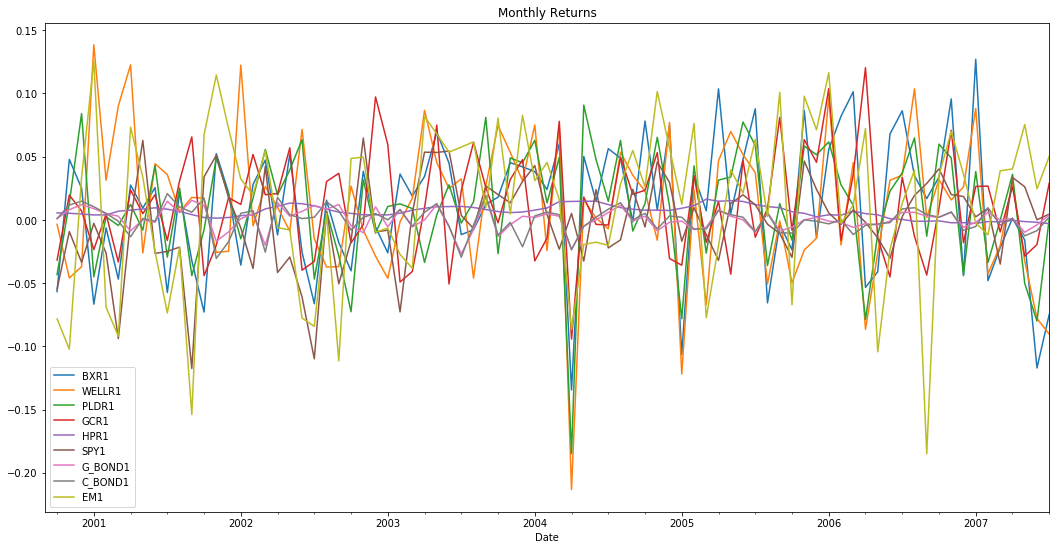

In [40]:
#Visualize the Monthly Return Relationships
monthly_returns.plot(figsize=(18,9), title = 'Monthly Returns')

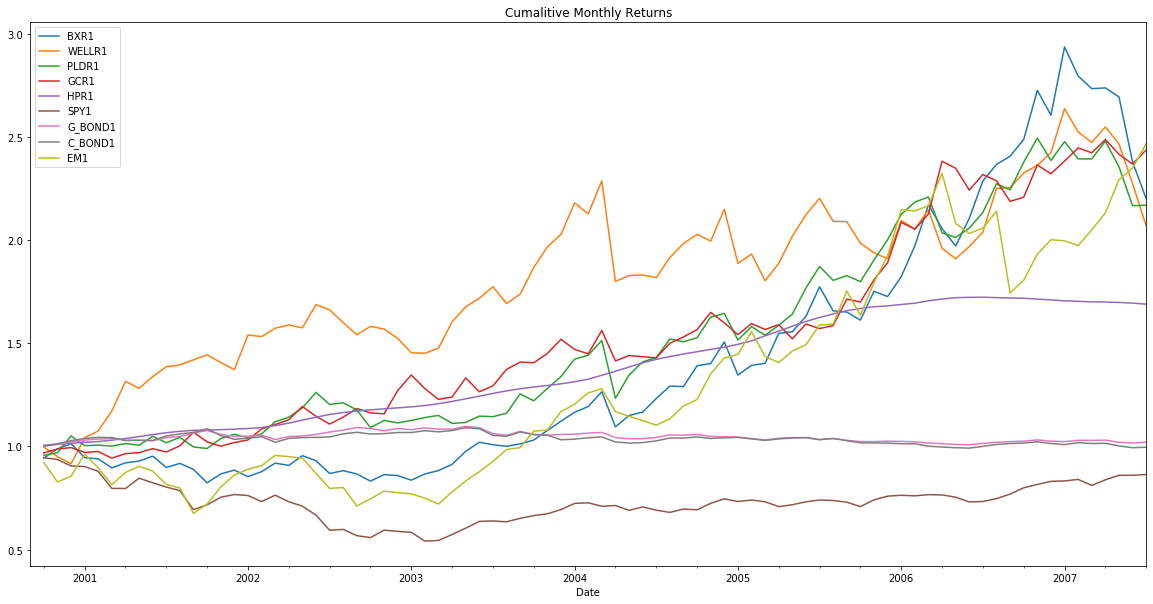

In [41]:
#Visualize the Cumaltive Monthly Returns
cumulative_returns = (1 + monthly_returns).cumprod()
cumulative_returns.plot(figsize= (20,10), title = 'Cumalitive Monthly Returns')

## 2000 Asset Class Risk Analysis

In [42]:
#Calculate Monthly Standard Deviation of Each Asset Class
monthly_std = monthly_returns.std()
print(monthly_std *100)

BXR1       5.294020
WELLR1     5.683482
PLDR1      4.577576
GCR1       4.046985
HPR1       0.494906
SPY1       3.597801
G_BOND1    0.854919
C_BOND1    1.036627
EM1        6.362104
dtype: float64


In [43]:
# Determine which Asset Classes are riskier than the S&P 500
sp500_risk = monthly_returns["SPY1"].std()
monthly_returns.std() > sp500_risk

BXR1        True
WELLR1      True
PLDR1       True
GCR1        True
HPR1       False
SPY1       False
G_BOND1    False
C_BOND1    False
EM1         True
dtype: bool

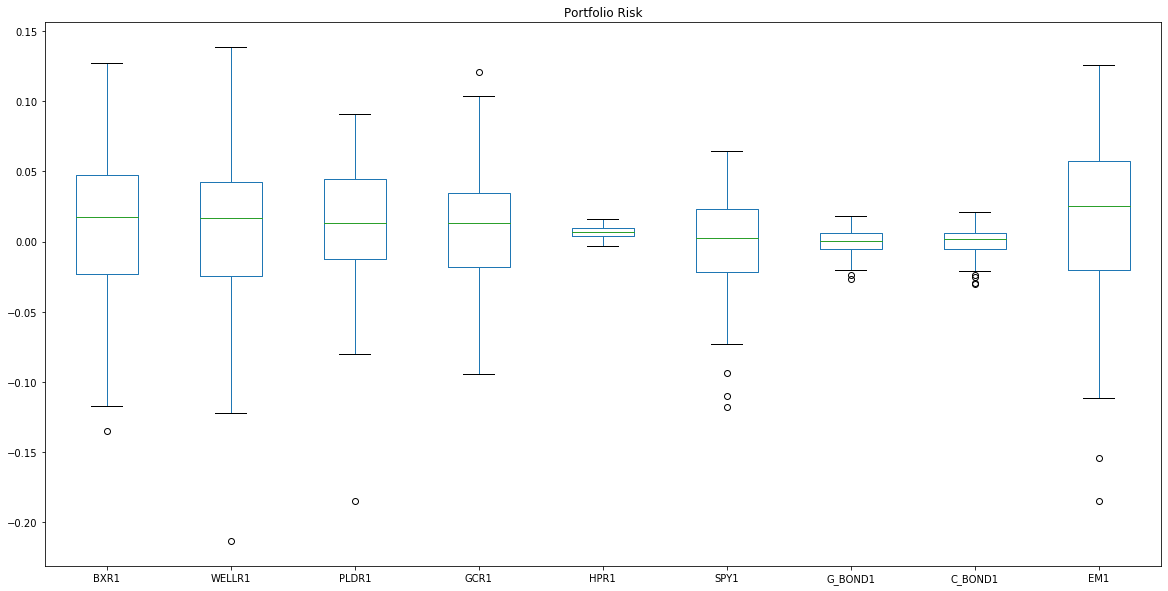

In [44]:
#Visualize Using a Box PLot
monthly_returns.plot.box(figsize=(20,10), title = 'Portfolio Risk')

In [45]:
#Sharpe Ratio Analysis
sharpe_ratios = ((monthly_returns) * 21 ) / ((monthly_std) * np.sqrt(21))
print(sharpe_ratios.mean())

BXR1       0.957082
WELLR1     0.848833
PLDR1      1.056302
GCR1       1.327204
HPR1       5.951745
SPY1      -0.143932
G_BOND1    0.150038
C_BOND1    0.000496
EM1        0.945174
dtype: float64


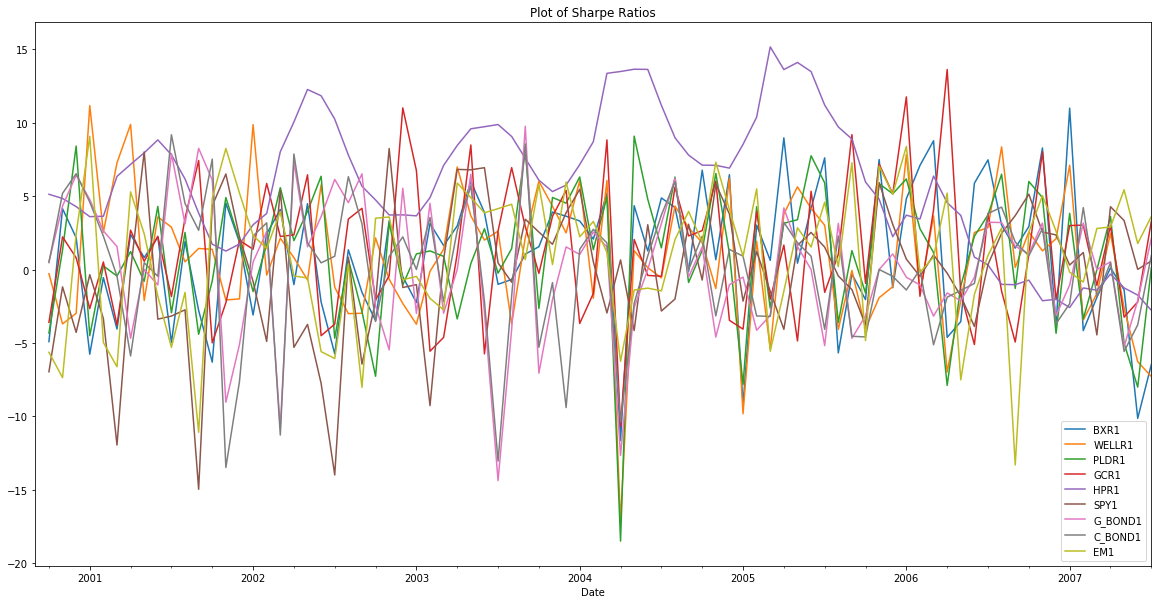

In [46]:
#Visualize Sharpe Ratios
sharpe_ratios.plot(figsize= (20,10), title = 'Plot of Sharpe Ratios')

In [47]:
#Determine on a Risk-Adjusted Basis (Sharpe), which Asset Classes provided a higher Risk-Adjusted-Return compared to the Risk Free Rate
risk_free_rate = sharpe_ratios["G_BOND1"].mean()
sharpe_ratios.mean() > risk_free_rate

BXR1        True
WELLR1      True
PLDR1       True
GCR1        True
HPR1        True
SPY1       False
G_BOND1    False
C_BOND1    False
EM1         True
dtype: bool

## 2000 Covariance, Variance, and Beta Against the Risk Free Rate

In [48]:
#Calculate Covariance for Asset Classes against the Risk Free Rate
BXR1_covariance = monthly_returns['BXR1'].cov(monthly_returns['G_BOND1'])
WELLR1_covariance = monthly_returns['WELLR1'].cov(monthly_returns['G_BOND1'])
PLDR1_covariance = monthly_returns['PLDR1'].cov(monthly_returns['G_BOND1'])
GCR1_covariance = monthly_returns['GCR1'].cov(monthly_returns['G_BOND1'])
HPR1_covariance = monthly_returns['HPR1'].cov(monthly_returns['G_BOND1'])
SPY1_covariance = monthly_returns['SPY1'].cov(monthly_returns['G_BOND1'])
C_BOND1_covariance = monthly_returns['C_BOND1'].cov(monthly_returns['G_BOND1'])
G_BOND1_covariance = monthly_returns['G_BOND1'].cov(monthly_returns['G_BOND1'])
EM1_covariance = monthly_returns['EM1'].cov(monthly_returns['G_BOND1'])


In [49]:
# Assemble Covariance in a Table
covariance_port = [BXR1_covariance, WELLR1_covariance, PLDR1_covariance, GCR1_covariance, HPR1_covariance, SPY1_covariance, C_BOND1_covariance, G_BOND1_covariance, EM1_covariance]
print(covariance_port)

[-1.083878242680161e-06, 7.99988489440575e-05, 5.660150831134752e-05, 5.1067599575883555e-05, -2.7585106546643705e-06, -0.0001113184511128763, 7.889221932541e-05, 7.308862595573004e-05, -0.00016261158455591892]


In [50]:
#Create a DataFrame for Covariance
covariance_portfolio = {'ASSET CLASS': ['BXR1', 'WELLR1','PLDR1','GCR1', 'HPR1', 'SPY1', 'C_BOND1', 'G_BOND1','EM1'],
        'COVARIANCE': [-1.083878242680161e-06, 7.99988489440575e-05, 5.660150831134752e-05, 5.1067599575883555e-05, -2.7585106546643705e-06, -0.0001113184511128763, 7.889221932541e-05, 7.308862595573004e-05, -0.00016261158455591892]
        }
covariance_df = pd.DataFrame(covariance_portfolio, columns = ['ASSET CLASS', 'COVARIANCE'])
covariance_df_1 = covariance_df.set_index('ASSET CLASS')

In [51]:
#Calculate Covariance for Asset Classes against the Risk Free Rate
BXR1_variance = monthly_returns['BXR1'].var()
WELLR1_variance = monthly_returns['WELLR1'].var()
PLDR1_variance = monthly_returns['PLDR1'].var()
GCR1_variance = monthly_returns['GCR1'].var()
HPR1_variance = monthly_returns['HPR1'].var()
SPY1_variance = monthly_returns['SPY1'].var()
C_BOND1_variance = monthly_returns['C_BOND1'].var()
G_BOND1_variance = monthly_returns['G_BOND1'].var()
EM1_variance = monthly_returns['EM1'].var()

In [52]:
#Assemble Variance in a Table
variance_port = [BXR1_variance, WELLR1_variance, PLDR1_variance, GCR1_variance, HPR1_variance, SPY1_variance, C_BOND1_variance, G_BOND1_variance, EM1_variance]
print(variance_port)

[0.0028026645325955435, 0.003230196339501364, 0.0020954201283311627, 0.001637808713404, 2.449320362131585e-05, 0.0012944170227367762, 0.00010745960577327783, 7.308862595573001e-05, 0.0040476364075217874]


In [53]:
#Create a DataFrame for Covariance
variance_portfolio = {'ASSET CLASS': ['BXR1', 'WELLR1','PLDR1','GCR1', 'HPR1', 'SPY1', 'C_BOND1', 'G_BOND1','EM1'],
        'VARIANCE': [0.0028026645325955435, 0.003230196339501364, 0.0020954201283311627, 0.001637808713404, 2.449320362131585e-05, 0.0012944170227367762, 0.00010745960577327783, 7.308862595573001e-05, 0.0040476364075217874]
        }
variance_df = pd.DataFrame(variance_portfolio, columns = ['ASSET CLASS','VARIANCE'])
variance_df_1 = variance_df.set_index('ASSET CLASS')

In [54]:
#Calculate Beta for Asset Classes 
BXR1_beta= BXR1_covariance/BXR1_variance
WELLR1_beta = WELLR1_covariance/WELLR1_variance
PLDR1_beta = PLDR1_covariance/PLDR1_variance
GCR1_beta = GCR1_covariance/GCR1_variance
HPR1_beta = HPR1_covariance/HPR1_variance
SPY1_beta = SPY1_covariance/SPY1_variance
C_BOND1_beta = C_BOND1_covariance/C_BOND1_variance
G_BOND1_beta = G_BOND1_covariance/G_BOND1_variance
EM1_beta = EM1_covariance/EM1_variance

In [55]:
#Assemble Beta in a Table
beta_port = [BXR1_beta, WELLR1_beta, PLDR1_beta, GCR1_beta, HPR1_beta, SPY1_beta, C_BOND1_beta, G_BOND1_beta, EM1_beta]
print(beta_port)

[-0.0003867313515672113, 0.02476594006555239, 0.02701200945150134, 0.031180441988091105, -0.11262351374336775, -0.08599890851057918, 0.7341569770119915, 1.0000000000000004, -0.040174454467732136]


In [56]:
#Create a DataFrame for Beta
beta_portfolio = {'ASSET CLASS': ['BXR1', 'WELLR1','PLDR1','GCR1', 'HPR1', 'SPY1', 'C_BOND1', 'G_BOND1','EM1'],
        'BETA': [-0.0003867313515672113, 0.02476594006555239, 0.02701200945150134, 0.031180441988091105, -0.11262351374336775, -0.08599890851057918, 0.7341569770119915, 1.0000000000000004, -0.040174454467732136]
        }
beta_df = pd.DataFrame(beta_portfolio, columns = ['ASSET CLASS','BETA'])
beta_df_1 = beta_df.set_index('ASSET CLASS')

### 2000 Covariance Dataframe

In [60]:
covariance_df_1.head(9)

,COVARIANCE
ASSET CLASS,
BXR1,-0.000001
WELLR1,0.000080
PLDR1,0.000057
GCR1,0.000051
HPR1,-0.000003
SPY1,-0.000111
C_BOND1,0.000079
G_BOND1,0.000073
EM1,-0.000163


### 2000 Variance Dataframe

In [61]:
variance_df_1.head(9)

,VARIANCE
ASSET CLASS,
BXR1,0.002803
WELLR1,0.003230
PLDR1,0.002095
GCR1,0.001638
HPR1,0.000024
SPY1,0.001294
C_BOND1,0.000107
G_BOND1,0.000073
EM1,0.004048


### 2000 Beta Dataframe

In [64]:
beta_df_1.head(9)

,BETA
ASSET CLASS,
BXR1,-0.000387
WELLR1,0.024766
PLDR1,0.027012
GCR1,0.031180
HPR1,-0.112624
SPY1,-0.085999
C_BOND1,0.734157
G_BOND1,1.000000
EM1,-0.040174


c

NameError: name 'c' is not defined